In [5]:
import pandas as pd

In [7]:
df = pd.DataFrame({'sex': [1,2,1,3,2,1],
                  'score': [5,4,3,4,2,6]})

In [9]:
df

sex  score
0    1      5
1    2      4
2    1      3
3    3      4
4    2      2
5    1      6

In [11]:
df['sex'].value_counts().sort_index()
#3은 이상치

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [13]:
df['score'].value_counts().sort_index()
#6은 이상치

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [23]:
import numpy as np

In [19]:
#sex가 3이면 NaN을 부여함으로써 이상치 처리
df['sex'] = np.where(df['sex']==3, np.nan, df['sex'])
df

sex  score
0  1.0      5
1  2.0      4
2  1.0      3
3  NaN      4
4  2.0      2
5  1.0      6

In [21]:
#score가 5 초과이면 NaN 부여함으로써 이상치 처리
df['score'] = np.where(df['score']>5, np.nan, df['score'])
df

sex  score
0  1.0    5.0
1  2.0    4.0
2  1.0    3.0
3  NaN    4.0
4  2.0    2.0
5  1.0    NaN

In [23]:
#결측치 제거 후 성별에 따른 score 평균 구하기
df.dropna(subset =  ['sex','score'])\
.groupby('sex')\
.agg(mean_score = ('score','mean'))

mean_score
sex            
1.0         4.0
2.0         3.0

<Axes: ylabel='hwy'>

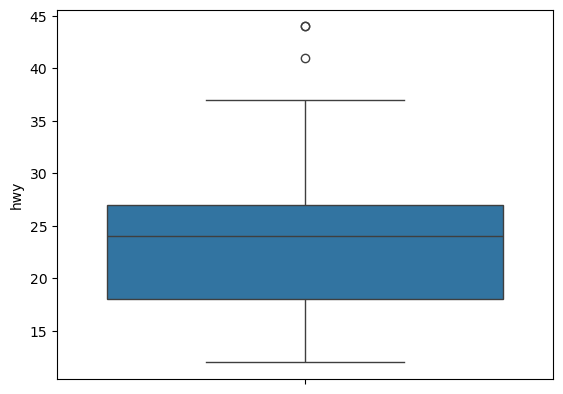

In [7]:
#상자 그림 살펴보기
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot (data=mpg, y='hwy')

In [13]:
#1사분위수, 3사분위수 구하기
pct25 = mpg['hwy'].quantile(.25)
pct25

pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [15]:
iqr = pct75 - pct25
iqr

9.0

In [17]:
pct25 - 1.5 * iqr #극단치의 경계(하한)

4.5

In [19]:
pct75 + 1.5 * iqr #극단치의 경계 (상한)

40.5

In [27]:
#극단치 결측 처리하기
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy']>40.5),
                     np.nan, mpg['hwy'])
mpg['hwy'].isna().sum()

3

In [29]:
mpg.dropna(subset = ['hwy'])\
    .groupby('drv')\
    .agg(mean_hwy = ('hwy','mean'))

mean_hwy
drv           
4    19.174757
f    27.728155
r    21.000000